In [34]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import os
from datetime import datetime, timedelta

In [135]:
import matplotlib as mpl
import matplotlib.font_manager as fm
mpl.rcParams['axes.unicode_minus']= False
path = 'C:/Windows/Fonts/malgun.ttf'
font_name = fm.FontProperties(fname = path, size = 50).get_name()
plt.rc('font', family=font_name)

In [11]:
os.listdir('C:\\Users\\glory\\Documents\\project\\dacon_cup\\data')

['info_competition.csv',
 'info_login.csv',
 'info_submission.csv',
 'info_user.csv',
 'submission.csv',
 'train.csv']

In [35]:
pd.read_csv('./data/submission.csv', encoding='cp949')

,DateTime,사용자,세션,신규방문자,페이지뷰
0,2020-11-09,0,0,0,0
1,2020-11-10,0,0,0,0
2,2020-11-11,0,0,0,0
3,2020-11-12,0,0,0,0
4,2020-11-13,0,0,0,0
...,...,...,...,...,...
56,2021-01-04,0,0,0,0
57,2021-01-05,0,0,0,0
58,2021-01-06,0,0,0,0
59,2021-01-07,0,0,0,0


In [20]:
train = pd.read_csv('./data/train.csv', encoding='cp949')
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19008 entries, 0 to 19007
Data columns (total 5 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   DateTime  19008 non-null  object
 1   사용자       19008 non-null  int64 
 2   세션        19008 non-null  int64 
 3   신규방문자     19008 non-null  int64 
 4   페이지뷰      19008 non-null  int64 
dtypes: int64(4), object(1)
memory usage: 742.6+ KB


In [22]:
train.head()

,DateTime,사용자,세션,신규방문자,페이지뷰
0,2018-09-09 00:00:00,19,19,8,206
1,2018-09-09 01:00:00,20,19,9,259
2,2018-09-09 02:00:00,12,9,1,48
3,2018-09-09 03:00:00,10,10,2,102
4,2018-09-09 04:00:00,6,5,3,18


In [203]:
competition = pd.read_csv('./data/info_competition.csv',encoding='cp949', index_col = 0)
competition.shape

(48, 15)

In [29]:
login = pd.read_csv('./data/info_login.csv',encoding='cp949', index_col = 0)
login.head()

C:\ProgramData\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3146: DtypeWarning: Columns (4,5) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


,login_id,user_id,c_time,platform,browser
0.0,14196.0,19195.0,2018-09-23 1:30,Windows 8,Internet Explorer 10.0
1.0,14234.0,22045.0,2018-09-23 2:46,Windows,Chrome 67.0.3396.99
2.0,14256.0,8790.0,2018-09-23 3:35,Windows,Chrome 69.0.3497.100
3.0,14278.0,NaN,2018-09-23 12:50,Windows,Chrome 69.0.3497.100
4.0,14279.0,NaN,2018-09-23 12:50,Windows,Chrome 69.0.3497.100


In [112]:
submission = pd.read_csv('./data/info_submission.csv',encoding='cp949', index_col = 0)
submission.head()

,sub_id,cpt_id,team_id,user_id,c_time
0.0,-250918.0,229255.0,5019.0,15880.0,2019-11-24 20:40
1.0,-250904.0,229611.0,5162.0,19772.0,2019-11-24 20:36
2.0,-250881.0,235401.0,5042.0,17801.0,2019-11-24 20:24
3.0,-250873.0,235401.0,5024.0,439.0,2019-11-24 20:23
4.0,-250860.0,229255.0,4890.0,13722.0,2019-11-24 20:19


In [116]:
submission.info()

<class 'pandas.core.frame.DataFrame'>
Float64Index: 103375 entries, 0.0 to nan
Data columns (total 5 columns):
 #   Column   Non-Null Count   Dtype  
---  ------   --------------   -----  
 0   sub_id   101587 non-null  float64
 1   cpt_id   101587 non-null  float64
 2   team_id  101501 non-null  float64
 3   user_id  99262 non-null   float64
 4   c_time   101587 non-null  object 
dtypes: float64(4), object(1)
memory usage: 4.7+ MB


In [118]:
len(submission.index)

103375

In [126]:
submission[['user_id']].value_counts()

user_id
10592.0    761
3697.0     426
4270.0     422
8571.0     417
499.0      371
          ... 
8052.0       1
18751.0      1
8046.0       1
8040.0       1
1.0          1
Length: 6398, dtype: int64

In [33]:
user = pd.read_csv('./data/info_user.csv',encoding='cp949', index_col = 0)
user.head()

,id,c_time,entered_competition_cnt,code_share_cnt,talk_board_cnt,country_code,python_level,ds_level
0.0,15994.0,2017-05-02 23:58,94.0,306.0,477.0,82.0,1.0,1.0
1.0,19195.0,2018-08-08 18:21,1.0,0.0,0.0,82.0,1.0,1.0
2.0,16339.0,2018-08-08 19:57,1.0,0.0,0.0,82.0,1.0,1.0
3.0,7290.0,2018-08-08 19:59,0.0,0.0,0.0,82.0,1.0,1.0
4.0,21287.0,2018-08-08 20:26,0.0,0.0,0.0,82.0,1.0,1.0


In [133]:
df_u = user.copy()
df_c = pd.to_datetime(df_u.c_time)


0.0   2017-05-02 23:58:00
1.0   2018-08-08 18:21:00
2.0   2018-08-08 19:57:00
3.0   2018-08-08 19:59:00
4.0   2018-08-08 20:26:00
              ...        
NaN                   NaT
NaN                   NaT
NaN                   NaT
NaN                   NaT
NaN                   NaT
Name: c_time, Length: 22103, dtype: datetime64[ns]

# train 일짜별로 정리

In [66]:
df_t = train.copy()

In [67]:
df_t['DateTime'] = pd.to_datetime(df_t['DateTime'])
df_t

,DateTime,사용자,세션,신규방문자,페이지뷰
0,2018-09-09 00:00:00,19,19,8,206
1,2018-09-09 01:00:00,20,19,9,259
2,2018-09-09 02:00:00,12,9,1,48
3,2018-09-09 03:00:00,10,10,2,102
4,2018-09-09 04:00:00,6,5,3,18
...,...,...,...,...,...
19003,2020-11-08 19:00:00,124,123,19,3128
19004,2020-11-08 20:00:00,166,159,29,4864
19005,2020-11-08 21:00:00,184,173,32,3426
19006,2020-11-08 22:00:00,163,155,34,2845


In [160]:
df_t['date'] = df_t.DateTime.dt.date
df_date = df_t.groupby('date').sum()
df_date  # train data를 date별로 합산(y형식에 맞춘 값)

,사용자,세션,신규방문자,페이지뷰
date,,,,
2018-09-09,281,266,73,1826
2018-09-10,264,247,51,2092
2018-09-11,329,310,58,1998
2018-09-12,300,287,45,2595
2018-09-13,378,344,50,3845
...,...,...,...,...
2020-11-04,4516,4472,1196,112683
2020-11-05,4155,4037,1044,102901
2020-11-06,3663,3576,825,88015


In [161]:
df_date = df_date.reset_index()
df_date

,date,사용자,세션,신규방문자,페이지뷰
0,2018-09-09,281,266,73,1826
1,2018-09-10,264,247,51,2092
2,2018-09-11,329,310,58,1998
3,2018-09-12,300,287,45,2595
4,2018-09-13,378,344,50,3845
...,...,...,...,...,...
787,2020-11-04,4516,4472,1196,112683
788,2020-11-05,4155,4037,1044,102901
789,2020-11-06,3663,3576,825,88015
790,2020-11-07,2472,2417,531,57386


### col연관성 (시각화 비교)

<AxesSubplot:>

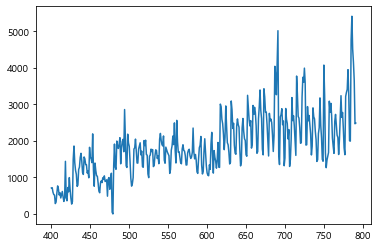

In [148]:
df_date.사용자[400:].plot()

<AxesSubplot:>

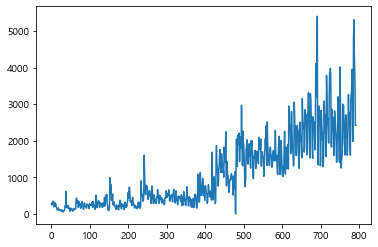

In [140]:
df_date.세션.plot()

<AxesSubplot:>

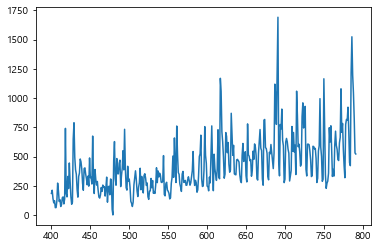

In [150]:
df_date.신규방문자[400:].plot()

<AxesSubplot:>

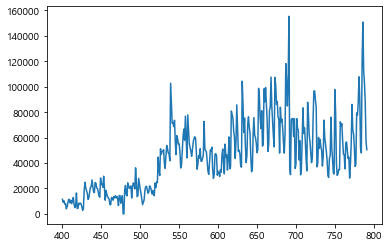

In [151]:
df_date.페이지뷰[400:].plot()

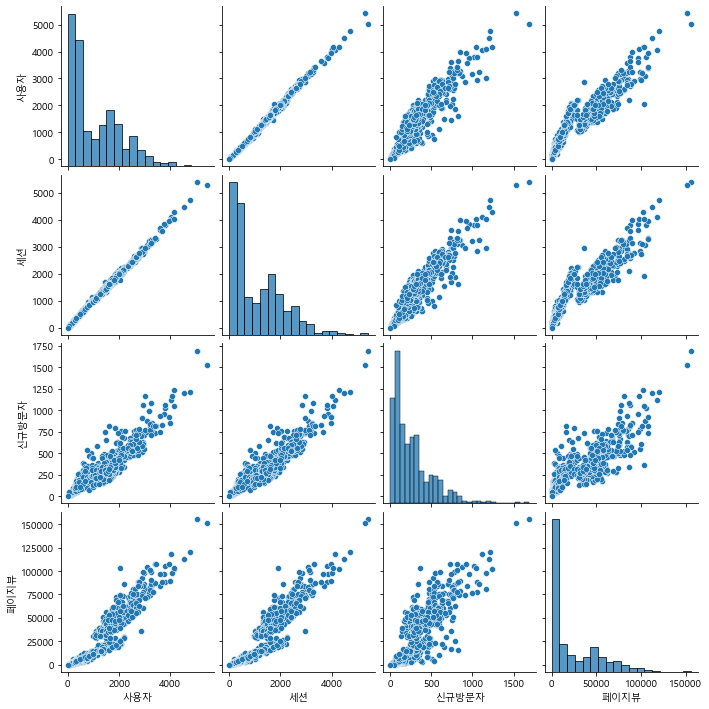

In [136]:
sns.pairplot(df_date)

# duration of competition

In [201]:
competition.shape

(48, 15)

In [169]:
df = competition.copy()
df.columns
df = df[['cpt_id', 'is_official', 'period_start', 'period_end', 'name',
       'participants', 'prize', 'merge_deadline']]
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 48 entries, 0 to 109
Data columns (total 8 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   cpt_id          48 non-null     int64 
 1   is_official     48 non-null     int64 
 2   period_start    48 non-null     object
 3   period_end      48 non-null     object
 4   name            48 non-null     object
 5   participants    48 non-null     int64 
 6   prize           48 non-null     int64 
 7   merge_deadline  48 non-null     object
dtypes: int64(4), object(4)
memory usage: 3.4+ KB


In [198]:
df

,cpt_id,is_official,period_start,period_end,name,participants,prize,merge_deadline
0,136,1,2018-08-14,2018-09-13,대출 상점 총 매출 예측 경진대회,303,850,2018-09-13 23:59
1,9565,1,2018-09-15,2018-10-13,병원 개/폐업 분류 예측 경진대회,448,350,2018-10-13 23:59
2,17801,1,2018-10-18,2018-12-31,아파트 경매가격 예측 경진대회,316,1000,2018-12-31 23:59
3,21265,1,2018-11-13,2019-01-31,아파트 실거래가 예측,568,800,2019-01-31 23:59
4,42473,1,2018-12-25,2019-01-10,신용카드 거래 데이터 시각화,252,100,2019-01-10 23:59
5,62540,1,2019-02-08,2019-07-18,KBO 타자 OPS 예측 경진대회,341,800,2019-07-18 23:59
6,68346,1,2019-03-26,2019-05-20,KBO 외국인 투수 스카우팅 최적화 경진대회,98,200,2019-05-20 23:59
7,82407,1,2019-05-06,2019-07-08,KCB 금융스타일 시각화 경진대회,269,1000,2019-07-08 23:59
8,140472,1,2019-07-11,2019-10-21,상점 신용카드 매출 예측 경진대회,624,200,2020-10-28 23:59
9,196878,1,2019-10-01,2019-10-27,전력 수요량 예측 경진대회,478,600,2019-10-27 23:59


In [196]:
sns.lineplot(df = df, x = 'is_official', y  = 'participants')

ValueError: Could not interpret value `is_official` for parameter `x`

In [170]:
# period의 type 변경 (datetime으로)
df['period_start'] = pd.to_datetime(df['period_start'])
df['period_end'] =  pd.to_datetime(df['period_end'])
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 48 entries, 0 to 109
Data columns (total 8 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   cpt_id          48 non-null     int64         
 1   is_official     48 non-null     int64         
 2   period_start    48 non-null     datetime64[ns]
 3   period_end      48 non-null     datetime64[ns]
 4   name            48 non-null     object        
 5   participants    48 non-null     int64         
 6   prize           48 non-null     int64         
 7   merge_deadline  48 non-null     object        
dtypes: datetime64[ns](2), int64(4), object(2)
memory usage: 3.4+ KB


In [171]:
# period 시간 제거
df['period_start'] = df.period_start.dt.date
df['period_end'] = df.period_end.dt.date

In [192]:
# start 기준 하루 추가
df.period_start + timedelta(days=1)

0      2018-08-15
1      2018-09-16
2      2018-10-19
3      2018-11-14
4      2018-12-26
5      2019-02-09
6      2019-03-27
7      2019-05-07
8      2019-07-12
9      2019-10-02
16     2019-11-12
17     2019-11-12
18     2019-11-22
19     2019-11-21
35     2019-02-06
39     2020-01-17
40     2020-01-03
44     2020-02-02
50     2020-03-02
51     2020-03-02
52     2020-10-21
53     2020-03-30
54     2020-04-02
66     2020-05-02
67     2020-05-16
69     2020-06-02
70     2020-06-02
71     2020-06-23
72     2020-06-26
73     2020-07-02
74     2020-07-15
75     2020-08-18
76     2020-08-04
83     2020-09-02
85     2020-09-24
86     2020-10-06
87     2020-09-29
92     2020-10-20
93     2020-11-24
94     2020-11-24
97     2020-10-30
99     2020-10-30
100    2020-11-12
101    2020-11-03
102    2020-11-12
106    2020-11-25
107    2020-12-10
109    2020-12-15
Name: period_start, dtype: object

In [ ]:
# start, end. ,merge 기준   /   시작 이후 몇일, 끝나기 몇일 전, merge 끝나기 전
def time_during(standard = 'end', days = 5) :
    

# 공휴일